In [ ]:
# Import required libraries, functions and classes

#Numpy and pandas for dataframes
import numpy as np
import pandas as pd

# nltk library for tokenization, lemmatizer, stopwords, pos tags and FreqDist
# import string for punctuation and str manipulations
import nltk
from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
import string

#Gensim library for LDA model creation . Corpora in gensim to create the id2word Dictionary and corpus of terms
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

#visualization using matplotlib and pyLDAvis for the LDA model viz
import matplotlib.pyplot as plt
#import pyLDAvis
#import pyLDAvis.gensim_models

#import warnings to ignore deprecation warning
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [ ]:
df = pd.read_csv("amazon-final copy.csv")



<ipython-input-2-771cc92c3049>:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("amazon-final copy.csv")


In [ ]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
df1 = df['reviews.text'] + df['reviews.title']

In [ ]:
df1.head()

0    This product so far has not disappointed. My c...
1    great for beginner or experienced person. Boug...
2    Inexpensive tablet for him to use and learn on...
3    I've had my Fire HD 8 two weeks now and I love...
4    I bought this for my grand daughter when she c...
dtype: object

In [ ]:
df1 = df1.astype("string")

In [ ]:
df1= df1.replace(np.nan, '', regex=True)
print(df1.head(5))

0    This product so far has not disappointed. My c...
1    great for beginner or experienced person. Boug...
2    Inexpensive tablet for him to use and learn on...
3    I've had my Fire HD 8 two weeks now and I love...
4    I bought this for my grand daughter when she c...
dtype: string


In [ ]:
df1 = df1.apply(lambda x: x.lower())

In [ ]:

blankIndex=[''] * len(df1)
df1.index=blankIndex

df1.head()

    this product so far has not disappointed. my c...
    great for beginner or experienced person. boug...
    inexpensive tablet for him to use and learn on...
    i've had my fire hd 8 two weeks now and i love...
    i bought this for my grand daughter when she c...
dtype: object

In [ ]:
import nltk

from nltk import FreqDist

In [ ]:
text = " ".join(scri for scri in df1)

In [ ]:
print ("There are {} words in the combination of all review.".format(len(text)))

There are 6207344 words in the combination of all review.


In [ ]:
word_freq_pros = df1.str.split(expand=True).stack().value_counts()

In [ ]:
word_freq_pros.head(50)

the        47075
to         35576
and        35076
for        33364
i          31928
a          26700
it         25468
is         21630
my         18677
this       17590
of         11541
tablet     11458
great      11215
with        9724
on          8251
have        8210
you         7958
that        7308
love        7184
in          7176
but         7083
as          6741
was         6658
easy        6356
so          6146
use         6082
very        5923
not         5662
amazon      5642
can         5484
fire        5194
kindle      5094
bought      5068
good        5010
product     4342
one         4266
she         4039
it's        4028
has         4019
all         4007
like        3926
an          3842
are         3793
price       3687
we          3550
be          3468
at          3267
would       3212
kids        3191
just        3147
dtype: int64

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenize the reviews

rev_words_token_final = []

for idx in range(0, 124):
  pro_df = df1[idx*50000:(idx+1)*50000]
  pro_df1 = pro_df.to_list()
  rev_words = [word_tokenize(review) for review in pro_df1]
  rev_words_token_final.extend(rev_words)

print(rev_words_token_final[:5])





#rev_words = [word_tokenize(review) for review in df2]
#print(rev_words)



[['this', 'product', 'so', 'far', 'has', 'not', 'disappointed', '.', 'my', 'children', 'love', 'to', 'use', 'it', 'and', 'i', 'like', 'the', 'ability', 'to', 'monitor', 'control', 'what', 'content', 'they', 'see', 'with', 'ease.kindle'], ['great', 'for', 'beginner', 'or', 'experienced', 'person', '.', 'bought', 'as', 'a', 'gift', 'and', 'she', 'loves', 'itvery', 'fast'], ['inexpensive', 'tablet', 'for', 'him', 'to', 'use', 'and', 'learn', 'on', ',', 'step', 'up', 'from', 'the', 'nabi', '.', 'he', 'was', 'thrilled', 'with', 'it', ',', 'learn', 'how', 'to', 'skype', 'on', 'it', 'already', '...', 'beginner', 'tablet', 'for', 'our', '9', 'year', 'old', 'son', '.'], ['i', "'ve", 'had', 'my', 'fire', 'hd', '8', 'two', 'weeks', 'now', 'and', 'i', 'love', 'it', '.', 'this', 'tablet', 'is', 'a', 'great', 'value.we', 'are', 'prime', 'members', 'and', 'that', 'is', 'where', 'this', 'tablet', 'shines', '.', 'i', 'love', 'being', 'able', 'to', 'easily', 'access', 'all', 'of', 'the', 'prime', 'conte

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
pos_tagged_review = [pos_tag(review) for review in rev_words_token_final]
print(len(pos_tagged_review))
print(pos_tagged_review[:5])

34660
[[('this', 'DT'), ('product', 'NN'), ('so', 'RB'), ('far', 'RB'), ('has', 'VBZ'), ('not', 'RB'), ('disappointed', 'VBN'), ('.', '.'), ('my', 'PRP$'), ('children', 'NNS'), ('love', 'VBP'), ('to', 'TO'), ('use', 'VB'), ('it', 'PRP'), ('and', 'CC'), ('i', 'VB'), ('like', 'IN'), ('the', 'DT'), ('ability', 'NN'), ('to', 'TO'), ('monitor', 'VB'), ('control', 'VB'), ('what', 'WP'), ('content', 'NN'), ('they', 'PRP'), ('see', 'VBP'), ('with', 'IN'), ('ease.kindle', 'NN')], [('great', 'JJ'), ('for', 'IN'), ('beginner', 'NN'), ('or', 'CC'), ('experienced', 'JJ'), ('person', 'NN'), ('.', '.'), ('bought', 'VBD'), ('as', 'IN'), ('a', 'DT'), ('gift', 'NN'), ('and', 'CC'), ('she', 'PRP'), ('loves', 'VBZ'), ('itvery', 'JJ'), ('fast', 'NN')], [('inexpensive', 'JJ'), ('tablet', 'NN'), ('for', 'IN'), ('him', 'PRP'), ('to', 'TO'), ('use', 'VB'), ('and', 'CC'), ('learn', 'VB'), ('on', 'IN'), (',', ','), ('step', 'VB'), ('up', 'RB'), ('from', 'IN'), ('the', 'DT'), ('nabi', 'NN'), ('.', '.'), ('he', 'P

In [ ]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [ ]:
nltk.help.upenn_tagset(tagpattern='NN*')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [ ]:
pos_noun_reviews = []
for review in pos_tagged_review:
    nouns=[]
    for word_tuple in review:
        if "NN" in word_tuple[1]:
            nouns.append(word_tuple)
        #elif 'VB' in word_tuple[1]:
             #nouns.append(word_tuple)
    pos_noun_reviews.append(nouns)

print(pos_noun_reviews[:50])

[[('product', 'NN'), ('children', 'NNS'), ('ability', 'NN'), ('content', 'NN'), ('ease.kindle', 'NN')], [('beginner', 'NN'), ('person', 'NN'), ('gift', 'NN'), ('fast', 'NN')], [('tablet', 'NN'), ('nabi', 'NN'), ('beginner', 'NN'), ('tablet', 'NN'), ('year', 'NN'), ('son', 'NN')], [('i', 'NN'), ('fire', 'NN'), ('weeks', 'NNS'), ('tablet', 'NN'), ('value.we', 'NN'), ('members', 'NNS'), ('tablet', 'NN'), ('access', 'NN'), ('content', 'NN'), ('movies', 'NNS'), ('laterthis', 'NN'), ('screen', 'NN'), ('look', 'NN'), ('infact', 'NN'), ('base', 'NN'), ('model', 'NN'), ('build', 'NN'), ('fire', 'NN'), ('running', 'NN'), ('thick', 'NN'), ('feel', 'NN'), ('back', 'NN'), ('tab', 'NN'), ('hands.good', 'NN')], [('i', 'NN'), ('daughter', 'NN'), ('i', 'NN'), ('user', 'NN'), ('age', 'NN'), ('name', 'NN'), ('sites', 'NNS'), ('content', 'NN'), ('age', 'NN'), ('simple', 'NN'), ('capabilities', 'NNS'), ('i', 'NN'), ('sd', 'NN'), ('card', 'NN'), ('plenty', 'NN'), ('storage', 'NN'), ('price', 'NN'), ('i', 'N

In [ ]:
pos_noun_reviews=[review for review in pos_noun_reviews if len(review)>=1]
print(len(pos_noun_reviews), pos_noun_reviews[:50])

34584 [[('product', 'NN'), ('children', 'NNS'), ('ability', 'NN'), ('content', 'NN'), ('ease.kindle', 'NN')], [('beginner', 'NN'), ('person', 'NN'), ('gift', 'NN'), ('fast', 'NN')], [('tablet', 'NN'), ('nabi', 'NN'), ('beginner', 'NN'), ('tablet', 'NN'), ('year', 'NN'), ('son', 'NN')], [('i', 'NN'), ('fire', 'NN'), ('weeks', 'NNS'), ('tablet', 'NN'), ('value.we', 'NN'), ('members', 'NNS'), ('tablet', 'NN'), ('access', 'NN'), ('content', 'NN'), ('movies', 'NNS'), ('laterthis', 'NN'), ('screen', 'NN'), ('look', 'NN'), ('infact', 'NN'), ('base', 'NN'), ('model', 'NN'), ('build', 'NN'), ('fire', 'NN'), ('running', 'NN'), ('thick', 'NN'), ('feel', 'NN'), ('back', 'NN'), ('tab', 'NN'), ('hands.good', 'NN')], [('i', 'NN'), ('daughter', 'NN'), ('i', 'NN'), ('user', 'NN'), ('age', 'NN'), ('name', 'NN'), ('sites', 'NNS'), ('content', 'NN'), ('age', 'NN'), ('simple', 'NN'), ('capabilities', 'NNS'), ('i', 'NN'), ('sd', 'NN'), ('card', 'NN'), ('plenty', 'NN'), ('storage', 'NN'), ('price', 'NN'), ('

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
wnl = WordNetLemmatizer()
lemmatized_words =[]
for review in pos_noun_reviews:
    lemma_word=[]
    for word in review:
        lemma_word.append(wnl.lemmatize(word[0]))
    lemmatized_words.append(lemma_word)

print(lemmatized_words[:50])

[['product', 'child', 'ability', 'content', 'ease.kindle'], ['beginner', 'person', 'gift', 'fast'], ['tablet', 'nabi', 'beginner', 'tablet', 'year', 'son'], ['i', 'fire', 'week', 'tablet', 'value.we', 'member', 'tablet', 'access', 'content', 'movie', 'laterthis', 'screen', 'look', 'infact', 'base', 'model', 'build', 'fire', 'running', 'thick', 'feel', 'back', 'tab', 'hands.good'], ['i', 'daughter', 'i', 'user', 'age', 'name', 'site', 'content', 'age', 'simple', 'capability', 'i', 'sd', 'card', 'plenty', 'storage', 'price', 'i', 'tablet', 'hundred', 'dollar', 'speed', 'capacity', 'basic', 'everything', 'people', 'fraction', 'tablet', 'kid'], ['amazon', 'fire', 'tablet', 'size', 'i', 'husband', 'screen', 'phone', 'year', 'purchase.just'], ['e-reading', 'go', 'weight', 'price', 'point', 'purchase.great', 'tablet'], ['i', 'christmas', 'gift', 'inlaws', 'husband', 'uncle', 'feature', 'gift'], ['device', 'book', 'i', 'e-books', 'tablet', 'brand', 'i', 'choice', 'i', 'time', 'book', 'reader',

In [ ]:
from wordcloud import STOPWORDS

In [ ]:
stopwords = STOPWORDS

In [ ]:
lis = ['the', 'to','and','i','for','a','it','is','my','this','for','with','on','have','you','that','in','but','as','was','so','can','we','be','at','are','she','has']

In [ ]:
stopwords.update(lis)

In [ ]:
print(stopwords)

{'any', 'through', 'me', 'does', 'both', "we'll", 'as', 'during', 'here', 'nor', 'up', "there's", 'once', 'they', 'this', "we're", 'out', 'about', 'am', 'been', "didn't", 'be', 'com', 'so', "hasn't", 'do', 'how', "you'd", 'or', 'just', 'has', 'should', 'over', "when's", 'them', "you'll", 'yourselves', 'his', 'hence', 'from', 'however', 'under', 'our', 'were', 'at', 'k', "she'll", 'yours', 'more', 'between', 'only', 'since', 'who', 'would', 'your', "haven't", 'before', "he'll", 'for', 'have', 'myself', 'shall', 'on', 'ours', "where's", "can't", "shan't", 'where', 'why', "she's", 'because', "i'd", 'against', 'above', 'their', 'to', 'again', 'otherwise', 'very', 'but', 'all', 'than', 'having', 'below', 'each', 'get', 'was', 'the', 'we', 'himself', 'other', 'she', 'else', 'few', "it's", 'that', "they're", "we've", "doesn't", 'most', 'too', "won't", "aren't", 'he', 'ever', "he'd", 'her', 'off', "she'd", 'into', "you've", "what's", "i've", 'my', "who's", 'then', 'are', 'it', 'of', 'could', '

In [ ]:
stop_words1 = list(stopwords)

In [ ]:
# The o/p from lemmatizer still has many composite words that still contain emojis , special characters etc.
# Using tweet tokenizer for isolating them better.
tweet_tokenize = TweetTokenizer()

#Create list of stopwords with punctuations.Manually added token ['\s'] as this is usually seperated in tokenize

stop_words = stop_words1+list(string.punctuation)+["\'s"]

filtered_rev_words=[]

for review in lemmatized_words:
    filter_words=[]
    for words in review:
        rev_words = []
        rev_words = tweet_tokenize.tokenize(words)
        for word in rev_words:
            if word not in stop_words1:
                filter_words.append(word)
    filtered_rev_words.append(filter_words)

In [ ]:
filtered_rev_words=[review for review in filtered_rev_words if len(review)>=1]
print(len(filtered_rev_words),filtered_rev_words[:100])

34557 [['product', 'child', 'ability', 'content', 'ease.kindle'], ['beginner', 'person', 'gift', 'fast'], ['tablet', 'nabi', 'beginner', 'tablet', 'year', 'son'], ['fire', 'week', 'tablet', 'value.we', 'member', 'tablet', 'access', 'content', 'movie', 'laterthis', 'screen', 'look', 'infact', 'base', 'model', 'build', 'fire', 'running', 'thick', 'feel', 'back', 'tab', 'hands.good'], ['daughter', 'user', 'age', 'name', 'site', 'content', 'age', 'simple', 'capability', 'sd', 'card', 'plenty', 'storage', 'price', 'tablet', 'hundred', 'dollar', 'speed', 'capacity', 'basic', 'everything', 'people', 'fraction', 'tablet', 'kid'], ['amazon', 'fire', 'tablet', 'size', 'husband', 'screen', 'phone', 'year', 'purchase.just'], ['e-reading', 'go', 'weight', 'price', 'point', 'purchase.great', 'tablet'], ['christmas', 'gift', 'inlaws', 'husband', 'uncle', 'feature', 'gift'], ['device', 'book', 'e-books', 'tablet', 'brand', 'choice', 'time', 'book', 'reader', 'way'], ['book', 'reader.great', 'reader'],

In [ ]:
id2word = corpora.Dictionary(filtered_rev_words)

corpus =[]
for review in filtered_rev_words:
    new = id2word.doc2bow(review)
    corpus.append(new)

print(corpus[:20],"\n")
print("No of reviews:",len(corpus),"\n")
print("No of unique words:",len(id2word),"\n")

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5, 1), (6, 1), (7, 1), (8, 1)], [(5, 1), (9, 1), (10, 1), (11, 2), (12, 1)], [(2, 1), (11, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)], [(2, 1), (11, 2), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)], [(11, 1), (12, 1), (18, 1), (27, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)], [(11, 1), (46, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1)], [(7, 2), (54, 1), (63, 1), (64, 1), (65, 1), (66, 1)], [(11, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1)], [(67, 1), (72, 1), (75, 1)], [(11, 1), (46, 1), (52, 1), (76, 1), (77, 1)], [(4, 2), (25, 1), (27, 1)], [(11, 1), (25, 1), (78, 1), (79, 1), (80, 2)], [(39, 1), (81, 1), (82, 1)], [(57, 1)], [(1

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha = 10, eta = 8)

In [ ]:
lda_model.print_topics(num_words=12)

[(0,
  '0.013*"tv" + 0.009*"fire" + 0.005*"product" + 0.005*"device" + 0.004*"amazon" + 0.004*"box" + 0.004*"cable" + 0.003*"stick" + 0.002*"movie" + 0.002*"apps" + 0.001*"streaming" + 0.001*"apple"'),
 (1,
  '0.013*"tv" + 0.010*"fire" + 0.005*"product" + 0.005*"device" + 0.005*"amazon" + 0.004*"box" + 0.004*"cable" + 0.003*"stick" + 0.002*"movie" + 0.002*"apps" + 0.001*"streaming" + 0.001*"apple"'),
 (2,
  '0.013*"tv" + 0.009*"fire" + 0.007*"product" + 0.004*"box" + 0.004*"device" + 0.004*"amazon" + 0.004*"cable" + 0.003*"stick" + 0.002*"movie" + 0.002*"apps" + 0.001*"streaming" + 0.001*"apple"'),
 (3,
  '0.013*"tv" + 0.009*"fire" + 0.005*"product" + 0.005*"device" + 0.004*"amazon" + 0.004*"box" + 0.004*"cable" + 0.003*"stick" + 0.002*"movie" + 0.002*"apps" + 0.001*"streaming" + 0.001*"apple"'),
 (4,
  '0.013*"tv" + 0.009*"fire" + 0.006*"product" + 0.004*"device" + 0.004*"box" + 0.004*"amazon" + 0.004*"cable" + 0.003*"stick" + 0.002*"movie" + 0.002*"apps" + 0.001*"streaming" + 0.001*"

In [ ]:
topics=[]
topic_terms=[]
for idx in range(10):
    topics.append("Topic "+ str(idx+1))
    terms=[]
    for term in lda_model.get_topic_terms(idx,topn=22):
        terms.append(id2word[term[0]])
    topic_terms.append(terms)

for idx in range(10):
    print(idx,topic_terms[idx])

0 ['tv', 'fire', 'product', 'device', 'amazon', 'box', 'cable', 'stick', 'movie', 'apps', 'streaming', 'apple', 'show', 'thing', 'voice', 'kindle', 'time', 'roku', 'way', 'lot', 'quality', 'price']
1 ['tv', 'fire', 'product', 'device', 'amazon', 'box', 'cable', 'stick', 'movie', 'apps', 'streaming', 'apple', 'thing', 'show', 'voice', 'kindle', 'time', 'roku', 'way', 'lot', 'quality', 'price']
2 ['tv', 'fire', 'product', 'box', 'device', 'amazon', 'cable', 'stick', 'movie', 'apps', 'streaming', 'apple', 'show', 'thing', 'kindle', 'voice', 'roku', 'time', 'way', 'lot', 'price', 'quality']
3 ['tv', 'fire', 'product', 'device', 'amazon', 'box', 'cable', 'stick', 'movie', 'apps', 'streaming', 'apple', 'show', 'thing', 'voice', 'kindle', 'time', 'roku', 'way', 'lot', 'quality', 'price']
4 ['tv', 'fire', 'product', 'device', 'box', 'amazon', 'cable', 'stick', 'movie', 'apps', 'streaming', 'apple', 'show', 'thing', 'voice', 'kindle', 'roku', 'time', 'way', 'lot', 'price', 'quality']
5 ['tv', '

In [ ]:
df_topics = pd.DataFrame(topic_terms).transpose()
df_topics.columns = topics
df_topics

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,tv,tv,tv,tv,tv,tv,tv,tv,tv,tv
1,fire,fire,fire,fire,fire,fire,fire,fire,fire,fire
2,product,product,product,product,product,product,product,product,product,product
3,device,device,box,device,device,device,device,device,device,device
4,amazon,amazon,device,amazon,box,box,box,amazon,amazon,box
5,box,box,amazon,box,amazon,amazon,amazon,box,box,amazon
6,cable,cable,cable,cable,cable,cable,cable,cable,cable,cable
7,stick,stick,stick,stick,stick,stick,stick,stick,stick,stick
8,movie,movie,movie,movie,movie,movie,movie,movie,movie,movie
9,apps,apps,apps,apps,apps,apps,apps,apps,apps,apps


In [ ]:
df_topics.to_csv('tp(10,10,8).csv')

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_rev_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6609112052383675


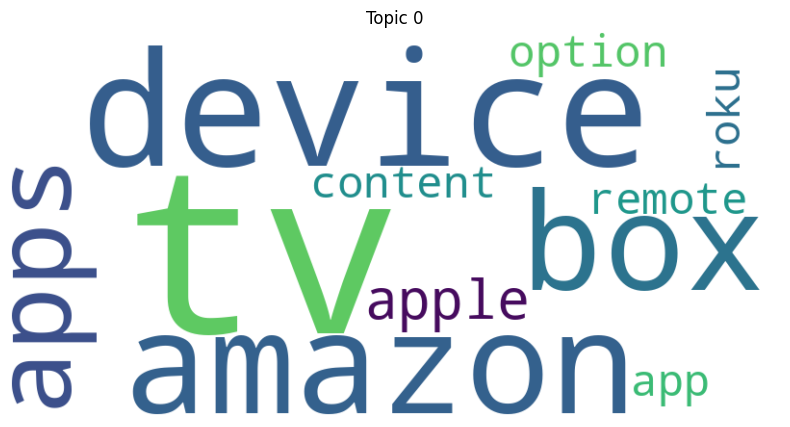

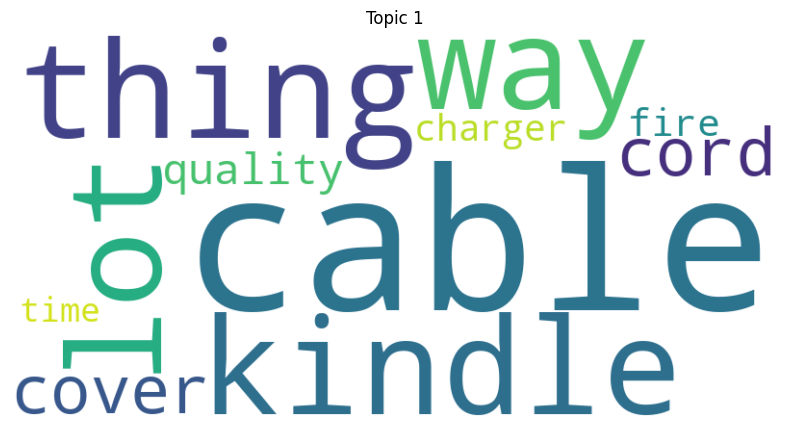

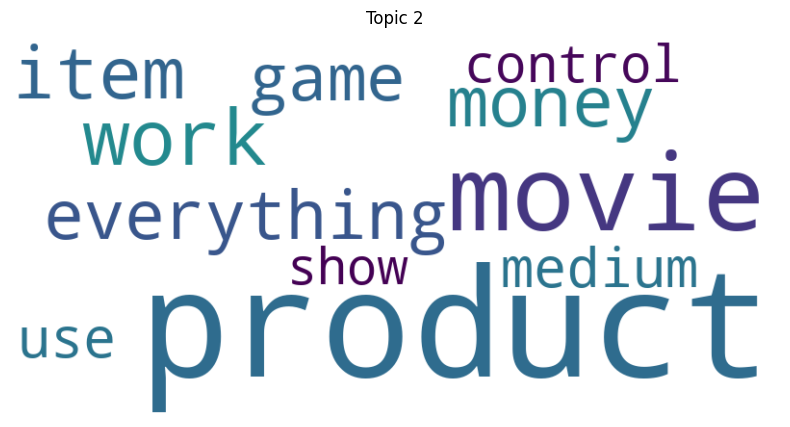

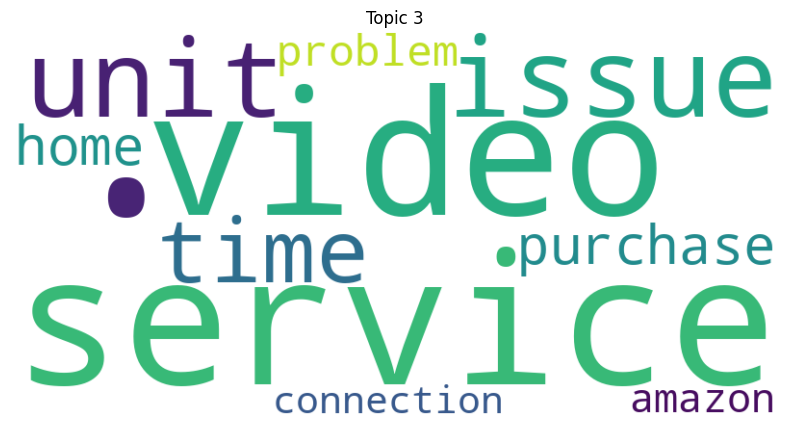

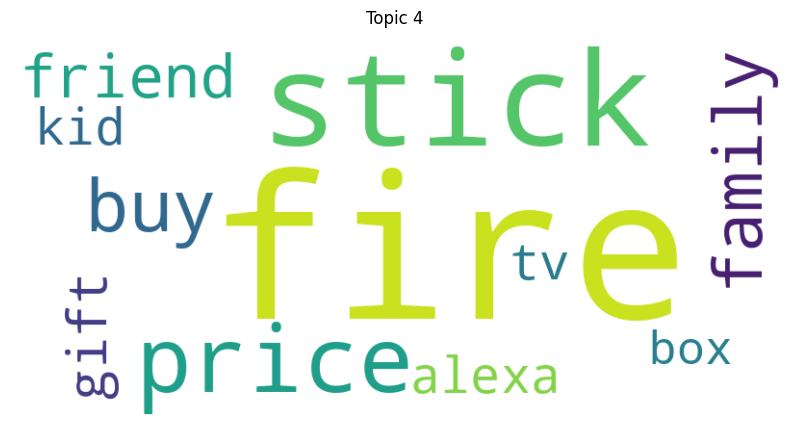

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = [(0,
  '0.197*"tv" + 0.074*"device" + 0.060*"amazon" + 0.054*"box" + 0.032*"apps" + 0.021*"apple" + 0.013*"remote" + 0.013*"roku" + 0.013*"option" + 0.013*"content" + 0.013*"app" + 0.013*"netflix"'),
 (1,
  '0.071*"cable" + 0.026*"thing" + 0.026*"kindle" + 0.024*"lot" + 0.024*"way" + 0.019*"cover" + 0.019*"cord" + 0.017*"quality" + 0.013*"fire" + 0.012*"charger" + 0.010*"time" + 0.010*"month"'),
 (2,
  '0.136*"product" + 0.056*"movie" + 0.025*"work" + 0.022*"item" + 0.020*"money" + 0.019*"everything" + 0.018*"game" + 0.012*"medium" + 0.012*"use" + 0.011*"control" + 0.010*"show" + 0.009*"entertainment"'),
 (3,
  '0.025*"." + 0.020*"service" + 0.018*"video" + 0.018*"issue" + 0.017*"unit" + 0.017*"time" + 0.015*"purchase" + 0.015*"home" + 0.015*"problem" + 0.013*"amazon" + 0.012*"connection" + 0.011*"day"'),
 (4,
  '0.207*"fire" + 0.065*"stick" + 0.027*"price" + 0.015*"buy" + 0.013*"family" + 0.010*"friend" + 0.008*"gift" + 0.007*"kid" + 0.007*"tv" + 0.007*"alexa" + 0.006*"box" + 0.006*"voice"')]


for topic_id, topic_data in data:
    # Extracting words and their weights for each topic
    word_weights = topic_data.split('" + ')
    word_weights[-1] = word_weights[-1].split('"')[0]  # Remove the last part after the last word

    word_cloud_data = {}
    for word_weight in word_weights:
        weight, word = word_weight.split('*')
        word = word.replace('"', '')  # Remove double quotes from each word
        word_cloud_data[word] = float(weight)

    # Generate word cloud for each topic
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_cloud_data)

    # Display the generated image for each topic
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_id}")
    plt.axis('off')
    plt.show()
    wordcloud.to_file('n.png')

Hellinger Distances:
[[0.         0.16152187 0.09689535 0.27339497 0.15251675]
 [0.16152187 0.         0.13876648 0.13496728 0.27020655]
 [0.09689535 0.13876648 0.         0.25090724 0.14222715]
 [0.27339497 0.13496728 0.25090724 0.         0.38439822]
 [0.15251675 0.27020655 0.14222715 0.38439822 0.        ]]


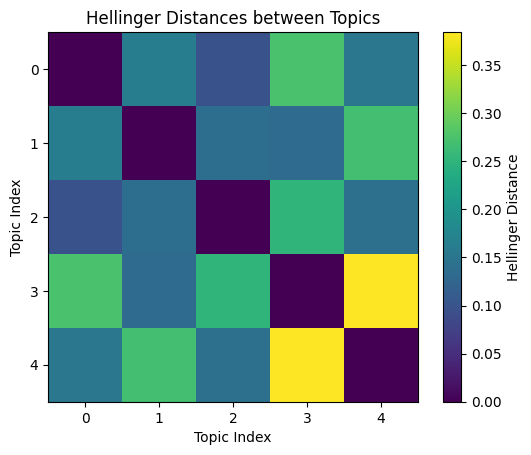

In [ ]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

def hellinger_distance(p, q):
    return np.sqrt(0.5 * np.sum((np.sqrt(p) - np.sqrt(q))**2))

# Define the topics with words and probabilities
topics = [(0,
  '0.197*"tv" + 0.074*"device" + 0.060*"amazon" + 0.054*"box" + 0.032*"apps" + 0.021*"apple" + 0.013*"remote" + 0.013*"roku" + 0.013*"option" + 0.013*"content" + 0.013*"app" + 0.013*"netflix"'),
 (1,
  '0.071*"cable" + 0.026*"thing" + 0.026*"kindle" + 0.024*"lot" + 0.024*"way" + 0.019*"cover" + 0.019*"cord" + 0.017*"quality" + 0.013*"fire" + 0.012*"charger" + 0.010*"time" + 0.010*"month"'),
 (2,
  '0.136*"product" + 0.056*"movie" + 0.025*"work" + 0.022*"item" + 0.020*"money" + 0.019*"everything" + 0.018*"game" + 0.012*"medium" + 0.012*"use" + 0.011*"control" + 0.010*"show" + 0.009*"entertainment"'),
 (3,
  '0.025*"." + 0.020*"service" + 0.018*"video" + 0.018*"issue" + 0.017*"unit" + 0.017*"time" + 0.015*"purchase" + 0.015*"home" + 0.015*"problem" + 0.013*"amazon" + 0.012*"connection" + 0.011*"day"'),
 (4,
  '0.207*"fire" + 0.065*"stick" + 0.027*"price" + 0.015*"buy" + 0.013*"family" + 0.010*"friend" + 0.008*"gift" + 0.007*"kid" + 0.007*"tv" + 0.007*"alexa" + 0.006*"box" + 0.006*"voice"')]



# Function to convert string representation of probabilities to numpy array
def parse_probabilities(prob_string):
    return np.array([float(item.split("*")[0]) for item in prob_string.split("+")])

# Calculate Hellinger distance between all pairs of topics
num_topics = len(topics)
hellinger_distances = np.zeros((num_topics, num_topics))

for i in range(num_topics):
    for j in range(i + 1, num_topics):
        prob_topic_i = parse_probabilities(topics[i][1])
        prob_topic_j = parse_probabilities(topics[j][1])

        # Ensure that probabilities sum to 1
        prob_topic_i /= np.sum(prob_topic_i)
        prob_topic_j /= np.sum(prob_topic_j)

        # Calculate Hellinger distance
        hellinger_distances[i, j] = hellinger_distance(prob_topic_i, prob_topic_j)
        hellinger_distances[j, i] = hellinger_distances[i, j]

# Display the Hellinger distances
print("Hellinger Distances:")
print(hellinger_distances)

# Plot the Hellinger distances
plt.imshow(hellinger_distances, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Hellinger Distance')
plt.title('Hellinger Distances between Topics')
plt.xlabel('Topic Index')
plt.ylabel('Topic Index')
plt.show()
